In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read csv file into a pandas dataframe
data = pd.read_csv("ecomm_sales_data.csv")
data.head()

,Product,Date,MRP,Discount,CLP,Platform,City,City Tier,Impressions,Clicks,Spend,Quantity Sold,Competitor,Competitor MRP,Competitor Discount,Competitor Price
0,Cream,4/1/2024,560,0.2,448.0,Myntra,Amritsar,Tier 3,3925,91,378,7,Competitor A,515,0.2,412.0
1,Cream,4/1/2024,560,0.2,448.0,Myntra,Bangalore,Tier 1,3348,66,167,3,Competitor A,515,0.2,412.0
2,Cream,4/1/2024,560,0.2,448.0,Flipkart,Varanasi,Tier 3,6124,169,1843,7,Competitor A,515,0.2,412.0
3,Cream,4/1/2024,560,0.2,448.0,Myntra,Kolkata,Tier 1,6885,124,475,7,Competitor A,515,0.2,412.0
4,Cream,4/1/2024,560,0.2,448.0,Nykaa,Amritsar,Tier 3,7396,84,497,3,Competitor A,515,0.2,412.0


In [4]:
# descriptive analysis
data.describe()

,MRP,Discount,CLP,Impressions,Clicks,Spend,Quantity Sold,Competitor MRP,Competitor Discount,Competitor Price
count,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000
mean,634.942342,0.148198,541.451582,5657.151151,252.748298,1255.503303,20.037337,524.158859,0.100786,471.476436
std,297.209526,0.098100,262.879473,3610.895641,211.180071,1086.169637,21.216629,167.330999,0.069582,155.898538
min,300.000000,0.000000,210.000000,70.000000,1.000000,1.000000,1.000000,350.000000,0.000000,280.000000
25%,499.000000,0.050000,349.300000,2667.000000,90.000000,369.000000,5.000000,400.000000,0.050000,340.000000
50%,560.000000,0.150000,476.000000,5265.000000,194.000000,948.000000,13.000000,515.000000,0.100000,437.750000
75%,649.000000,0.250000,616.550000,8175.250000,362.000000,1888.250000,27.000000,539.000000,0.150000,539.000000
max,1149.000000,0.300000,1149.000000,15000.000000,1185.000000,5212.000000,194.000000,810.000000,0.200000,810.000000


In [5]:
data.shape

(19980, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product              19980 non-null  object 
 1   Date                 19980 non-null  object 
 2   MRP                  19980 non-null  int64  
 3   Discount             19980 non-null  float64
 4   CLP                  19980 non-null  float64
 5   Platform             19980 non-null  object 
 6   City                 19980 non-null  object 
 7   City Tier            19980 non-null  object 
 8   Impressions          19980 non-null  int64  
 9   Clicks               19980 non-null  int64  
 10  Spend                19980 non-null  int64  
 11  Quantity Sold        19980 non-null  int64  
 12  Competitor           19980 non-null  object 
 13  Competitor MRP       19980 non-null  int64  
 14  Competitor Discount  19980 non-null  float64
 15  Competitor Price     19980 non-null 

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.shape

(19980, 16)

In [9]:
data.skew(numeric_only = True)

MRP                    0.795798
Discount               0.018169
CLP                    0.877454
Impressions            0.458649
Clicks                 1.210753
Spend                  1.025348
Quantity Sold          2.114724
Competitor MRP         0.763241
Competitor Discount    0.014183
Competitor Price       0.815110
dtype: float64

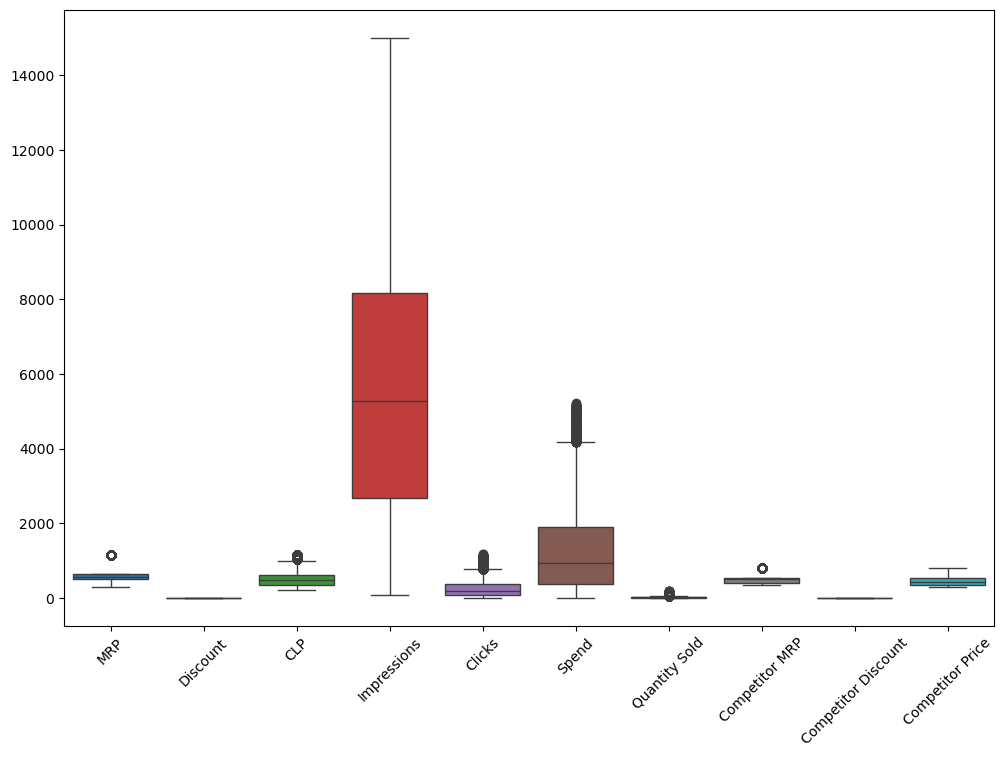

In [11]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.boxplot(data = data)
plt.show()

In [12]:
def outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    up = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    out = df[(df[column]>up) | (df[column]<lb)]
    return out

In [15]:
from scipy.stats import mstats
selected_columns = data.select_dtypes(include = ["number"])
for col in selected_columns:
    out = outliers(data,col)
    if col == "Quantity Sold":
        continue
    elif len(out)>0:
        print("Outliers found in",col,"and the count is",len(out))
        data[col] = mstats.winsorize(data[col], limits=[0.05, 0.05])  #capping the 5th and 95th percentile values
    else:
        print("No extreme outlier found in", col)

Outliers found in MRP and the count is 4406
No extreme outlier found in Discount
Outliers found in CLP and the count is 1923
No extreme outlier found in Impressions
Outliers found in Clicks and the count is 605
Outliers found in Spend and the count is 305
Outliers found in Competitor MRP and the count is 4406
No extreme outlier found in Competitor Discount
No extreme outlier found in Competitor Price


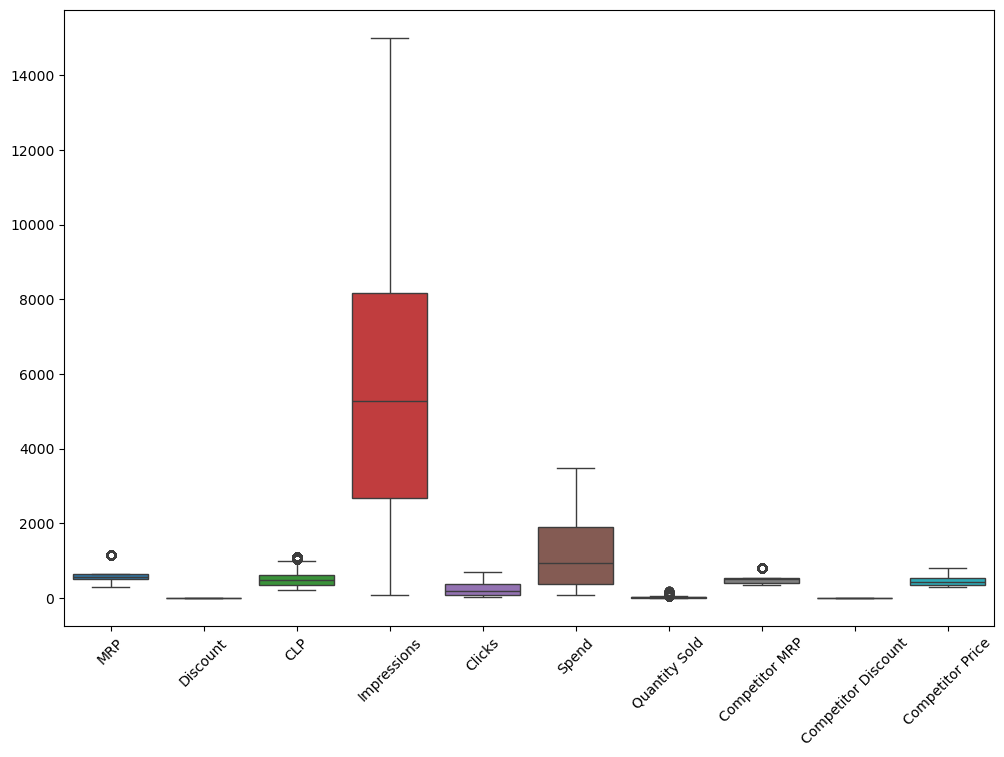

In [16]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.boxplot(data = data)
plt.show()

In [17]:
#measuring skewness
data.skew(numeric_only = True)

MRP                    0.795798
Discount               0.018169
CLP                    0.842467
Impressions            0.458649
Clicks                 0.845257
Spend                  0.787979
Quantity Sold          2.114724
Competitor MRP         0.763241
Competitor Discount    0.014183
Competitor Price       0.815110
dtype: float64

In [18]:
data["Date"] = pd.to_datetime(data["Date"])
data['Month_Name'] = data['Date'].dt.month_name()

In [20]:
data.drop(columns = "Date", inplace = True)


Univariate Analysis of Numerical Variables:


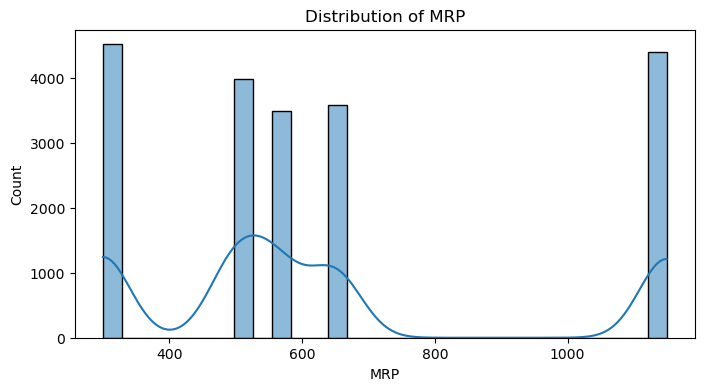

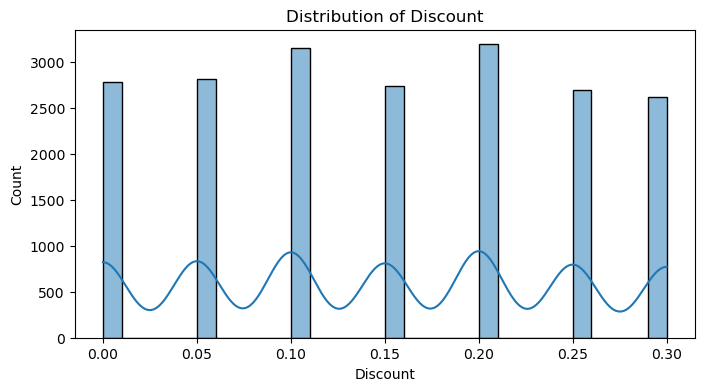

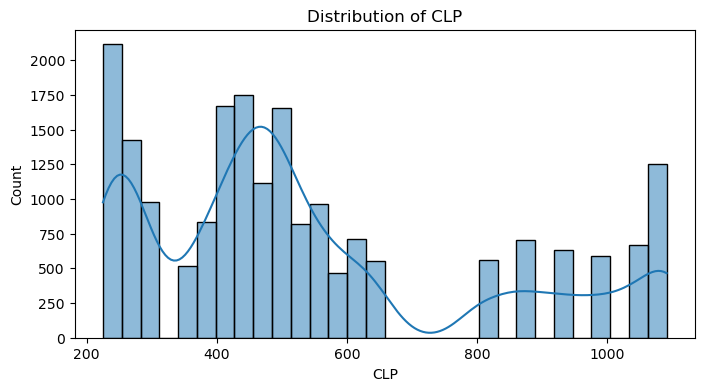

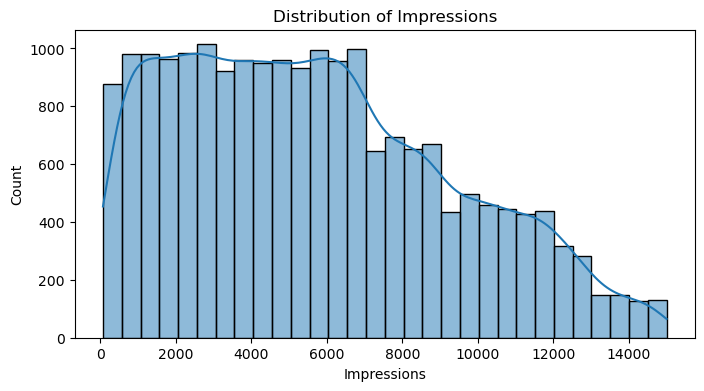

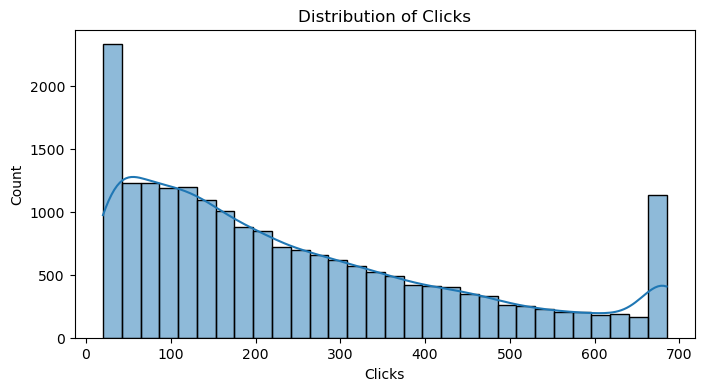

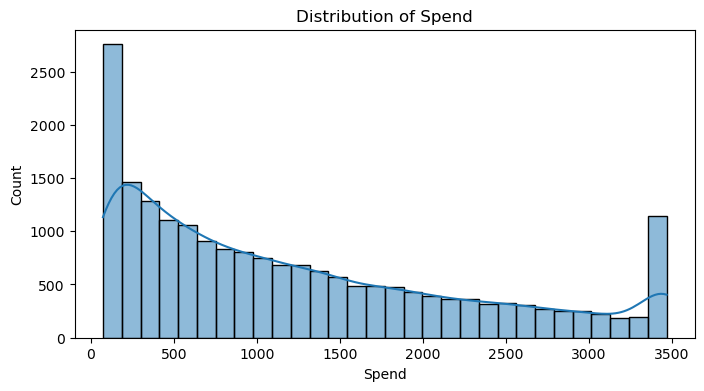

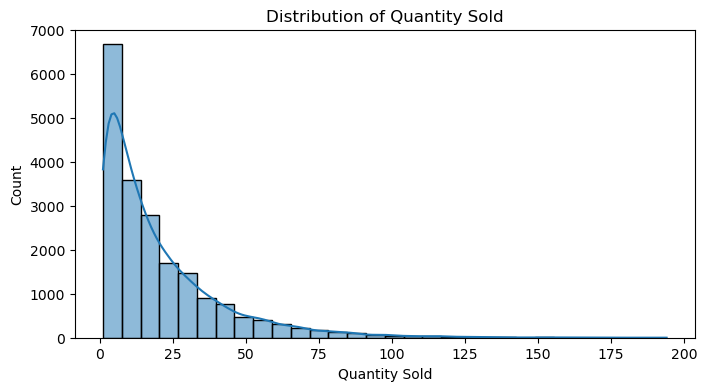

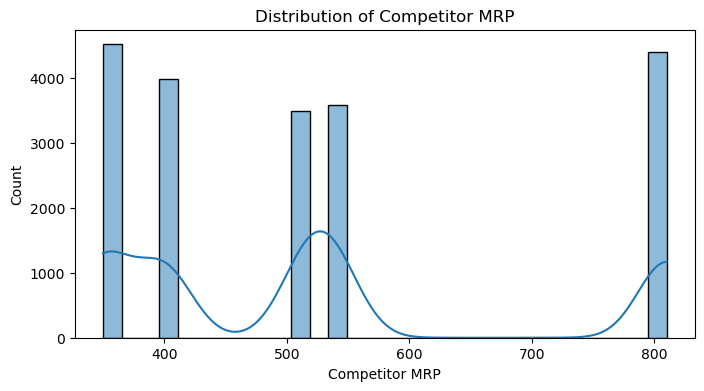

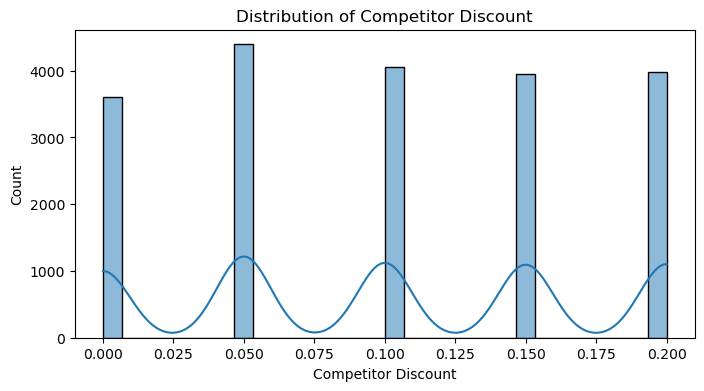

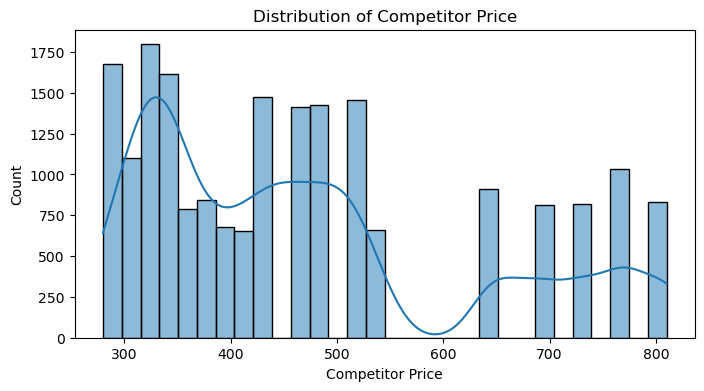

In [21]:
# Visualizing numerical features
num_cols = data.select_dtypes(include = ["number"])
print("\nUnivariate Analysis of Numerical Variables:")
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

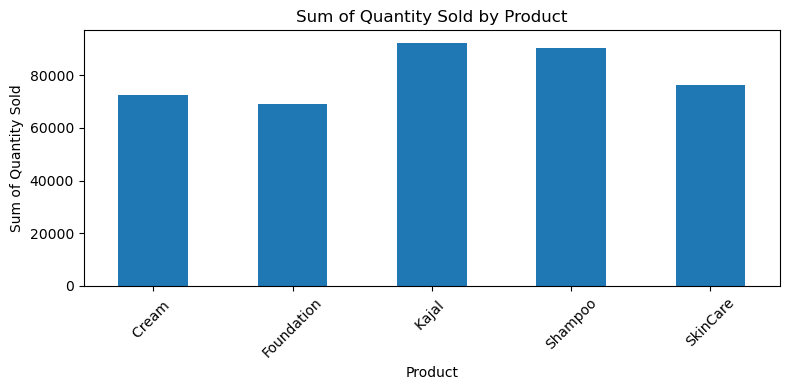

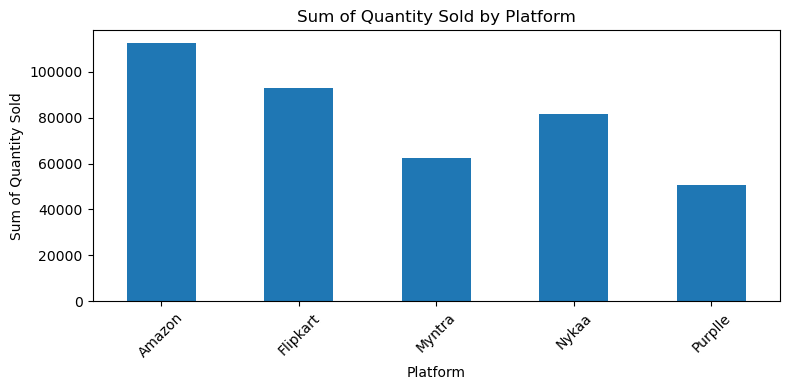

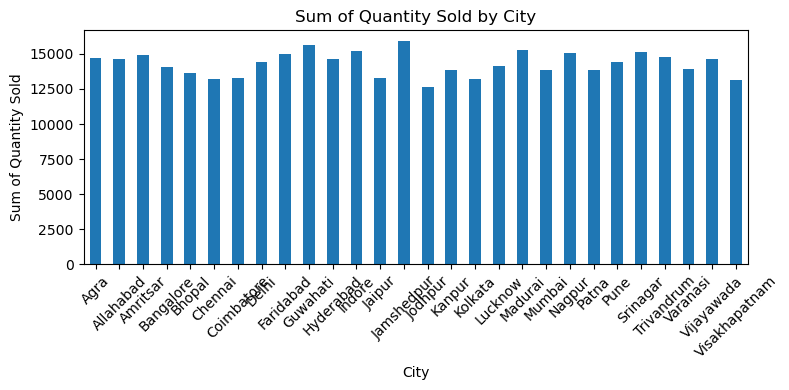

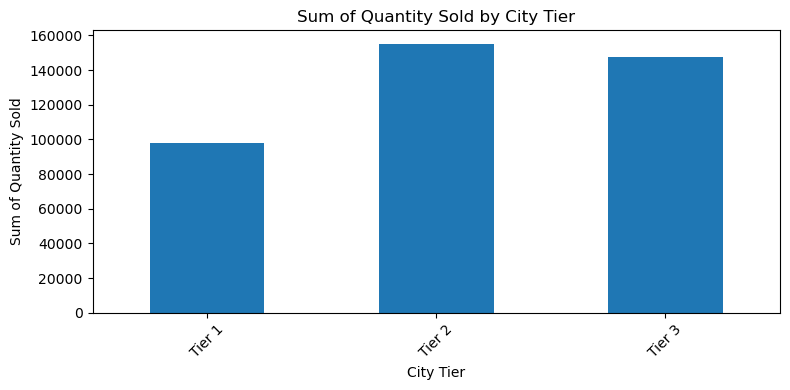

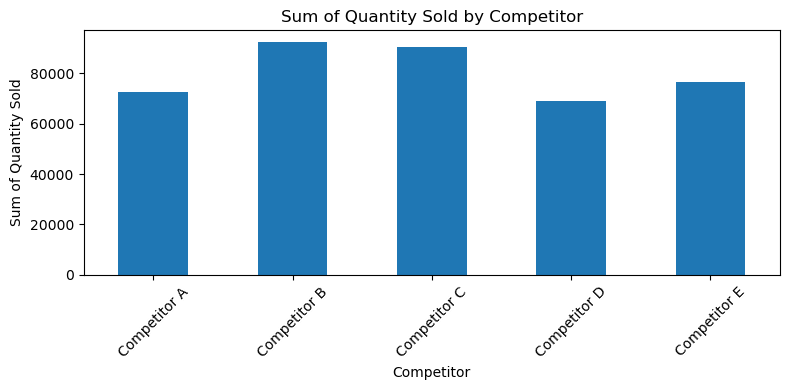

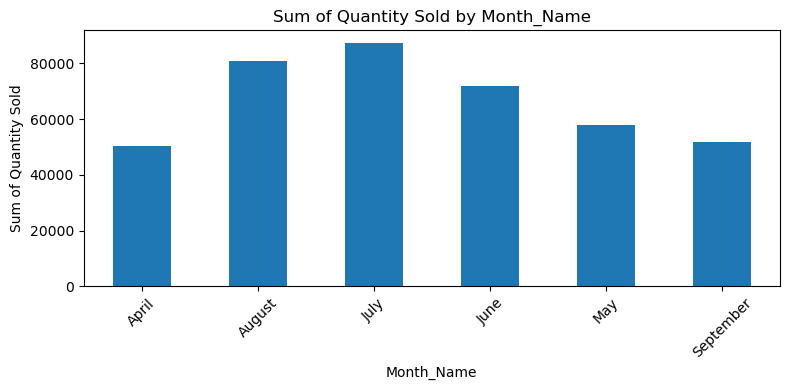

In [22]:
# Visualizing categorical features w.r.t Quantity sold
cat_vars = data.select_dtypes(include=['object','category']).columns
for cat_var in cat_vars:
    plt.figure(figsize=(8,4))  
    data.groupby(cat_var)['Quantity Sold'].sum().plot(kind='bar')  
    plt.title(f'Sum of Quantity Sold by {cat_var}') 
    plt.xlabel(cat_var)  
    plt.ylabel('Sum of Quantity Sold')  
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data = pd.get_dummies(data, columns=["Product", "Platform", "Competitor", "City Tier"], drop_first = True, dtype="int")
data["Month_Name"] = label.fit_transform(data["Month_Name"])

In [24]:
data.head()

,MRP,Discount,CLP,City,Impressions,Clicks,Spend,Quantity Sold,Competitor MRP,Competitor Discount,...,Platform_Flipkart,Platform_Myntra,Platform_Nykaa,Platform_Purplle,Competitor_Competitor B,Competitor_Competitor C,Competitor_Competitor D,Competitor_Competitor E,City Tier_Tier 2,City Tier_Tier 3
0,560,0.2,448.0,Amritsar,3925,91,378,7,515,0.2,...,0,1,0,0,0,0,0,0,0,1
1,560,0.2,448.0,Bangalore,3348,66,167,3,515,0.2,...,0,1,0,0,0,0,0,0,0,0
2,560,0.2,448.0,Varanasi,6124,169,1843,7,515,0.2,...,1,0,0,0,0,0,0,0,0,1
3,560,0.2,448.0,Kolkata,6885,124,475,7,515,0.2,...,0,1,0,0,0,0,0,0,0,0
4,560,0.2,448.0,Amritsar,7396,84,497,3,515,0.2,...,0,0,1,0,0,0,0,0,0,1


In [25]:
data["Net_Profit"] = data["CLP"] - data["Spend"]
data.head()

,MRP,Discount,CLP,City,Impressions,Clicks,Spend,Quantity Sold,Competitor MRP,Competitor Discount,...,Platform_Myntra,Platform_Nykaa,Platform_Purplle,Competitor_Competitor B,Competitor_Competitor C,Competitor_Competitor D,Competitor_Competitor E,City Tier_Tier 2,City Tier_Tier 3,Net_Profit
0,560,0.2,448.0,Amritsar,3925,91,378,7,515,0.2,...,1,0,0,0,0,0,0,0,1,70.0
1,560,0.2,448.0,Bangalore,3348,66,167,3,515,0.2,...,1,0,0,0,0,0,0,0,0,281.0
2,560,0.2,448.0,Varanasi,6124,169,1843,7,515,0.2,...,0,0,0,0,0,0,0,0,1,-1395.0
3,560,0.2,448.0,Kolkata,6885,124,475,7,515,0.2,...,1,0,0,0,0,0,0,0,0,-27.0
4,560,0.2,448.0,Amritsar,7396,84,497,3,515,0.2,...,0,1,0,0,0,0,0,0,1,-49.0


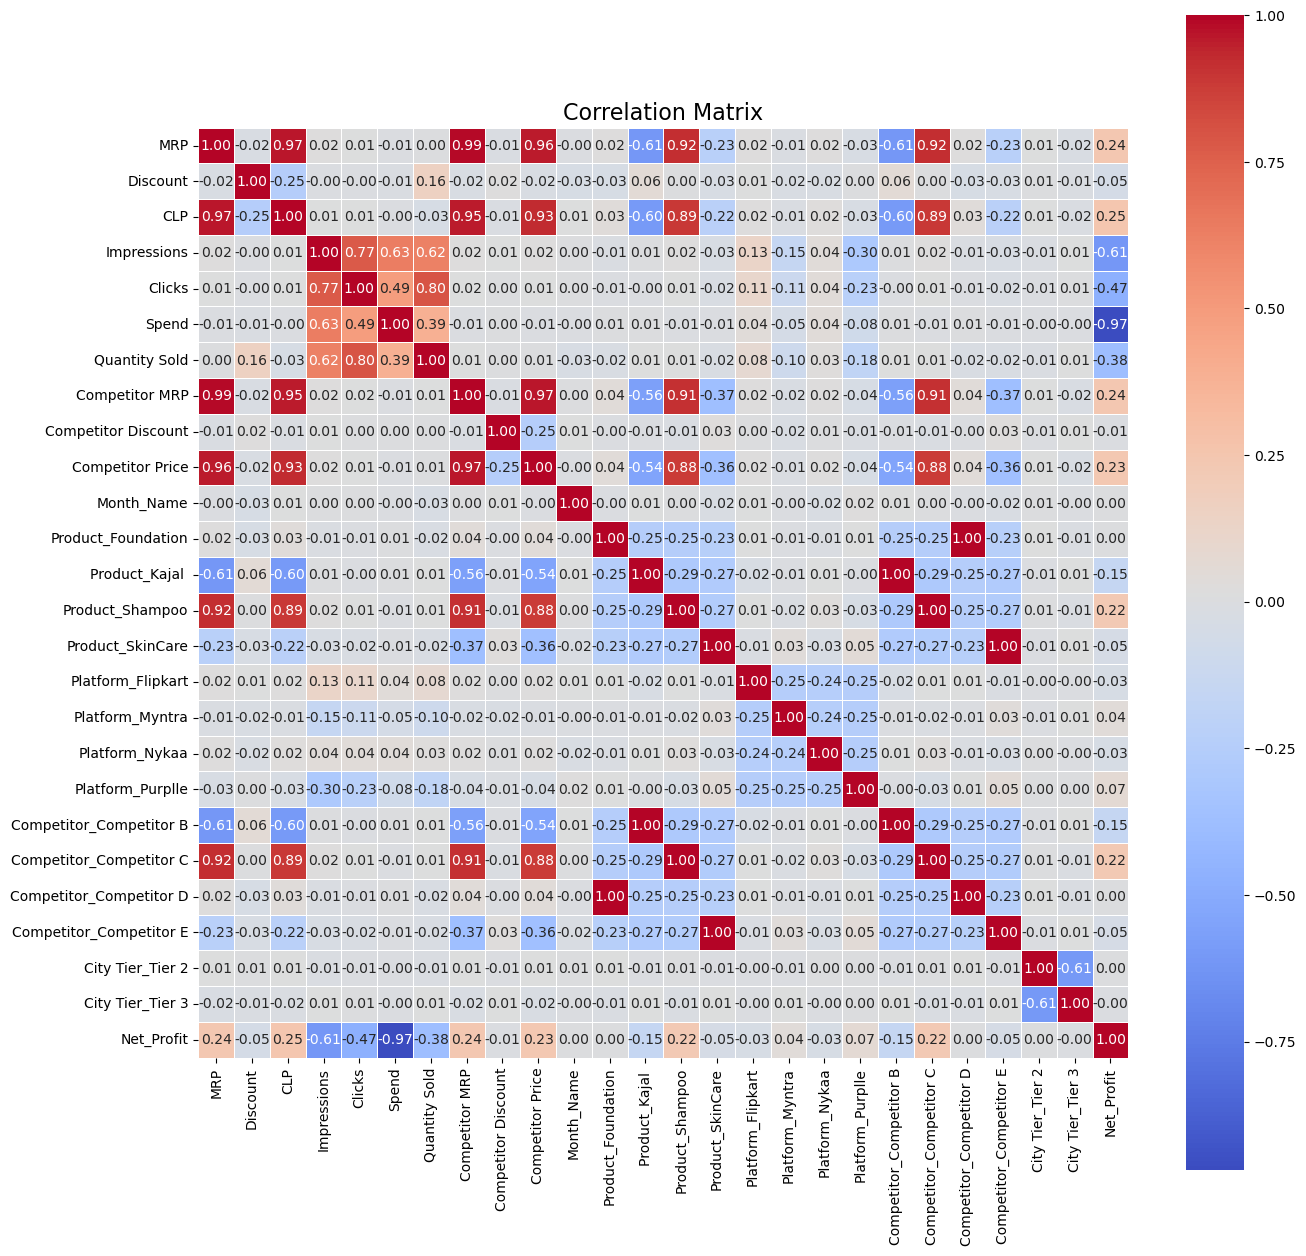

In [27]:
#checking the correlation matrix
correlation_matrix = data.drop(columns=["City"]).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar=True)           
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [28]:
X = data.drop(columns=["Quantity Sold", "City"])
y = data["Quantity Sold"]

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [47]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000, random_state=42, tol=0.01),
    "Ridge Regression": Ridge(alpha=0.1, max_iter=10000, random_state=42, tol=0.01),  
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=42, tol=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1),
    "Random Forest": RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1),
    "XGBoost": XGBRegressor(random_state=42, learning_rate=0.1, max_depth=3),
}

In [48]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Example tensor operation on GPU
tensor = torch.randn(3, 3).to(device)
print(tensor)
print("Tensor operation successful on GPU.")



Using device: cuda
tensor([[-0.0848,  1.3251,  0.6762],
        [-0.4900,  0.0556,  0.8573],
        [ 1.5596, -0.7085,  1.1128]], device='cuda:0')
Tensor operation successful on GPU.


Linear Regression - RMSE: 12.6555, MAE: 8.1001, R2: 0.6508


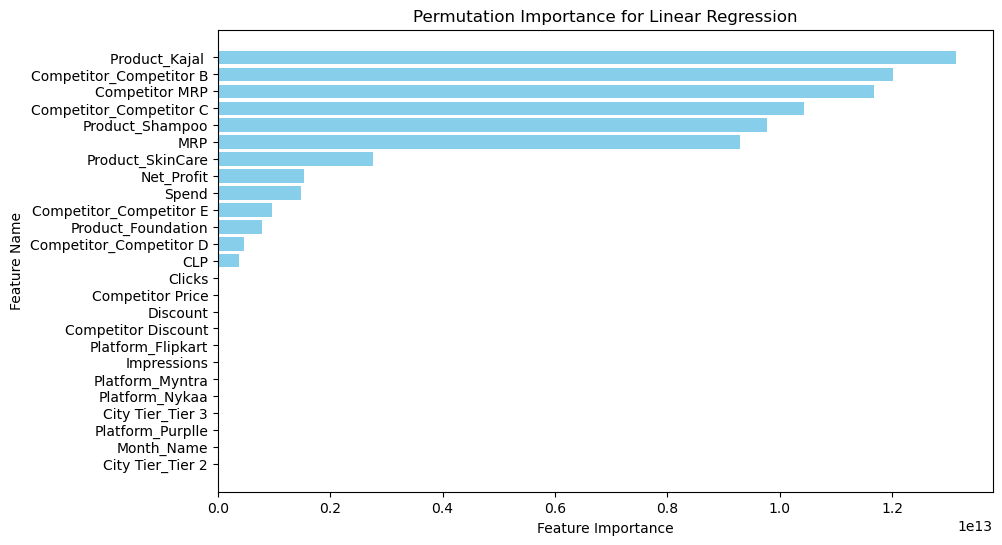

Lasso Regression - RMSE: 12.6534, MAE: 8.0686, R2: 0.6509


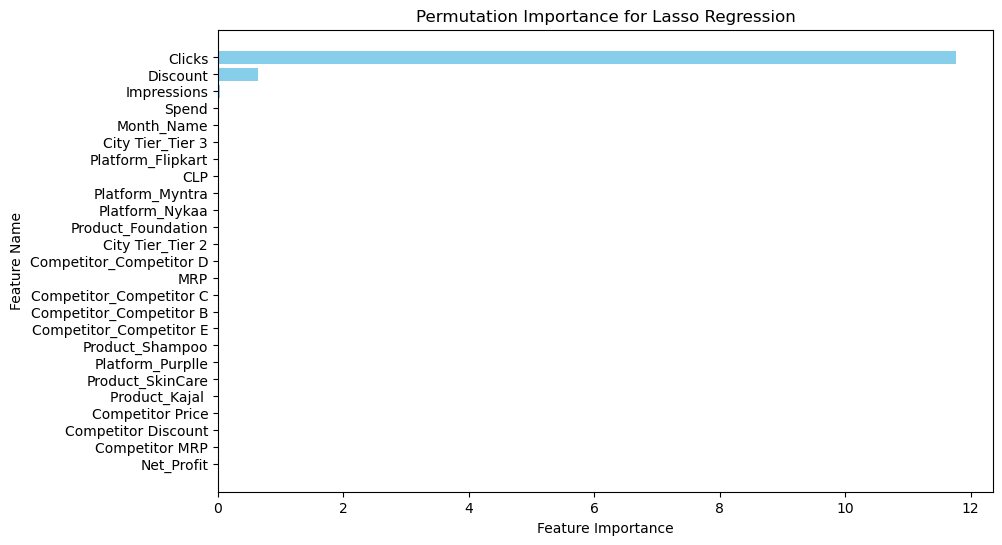

Ridge Regression - RMSE: 12.6542, MAE: 8.0993, R2: 0.6509


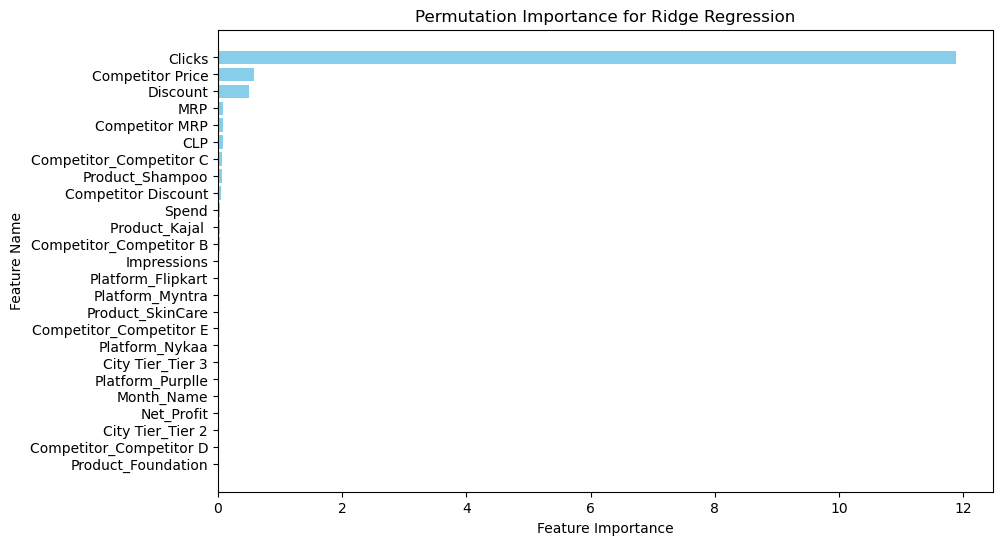

Elastic Net - RMSE: 12.6712, MAE: 8.0208, R2: 0.6499


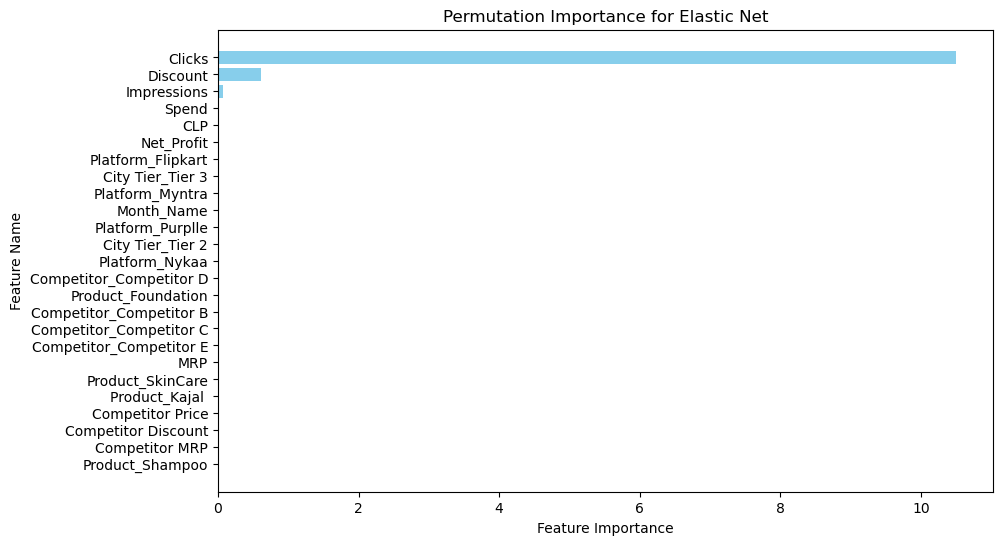

Decision Tree - RMSE: 13.2394, MAE: 7.7926, R2: 0.6178


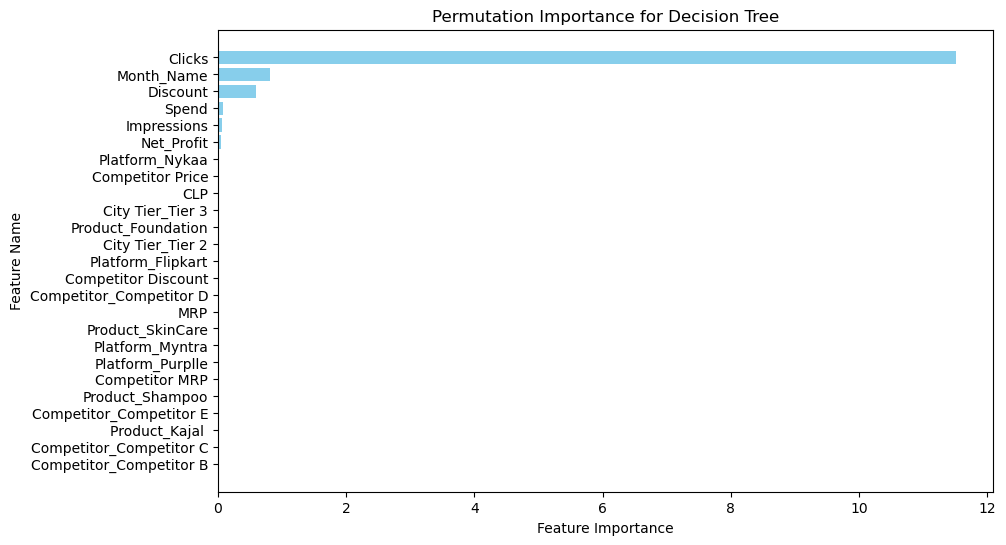

Random Forest - RMSE: 11.5519, MAE: 7.1426, R2: 0.7090


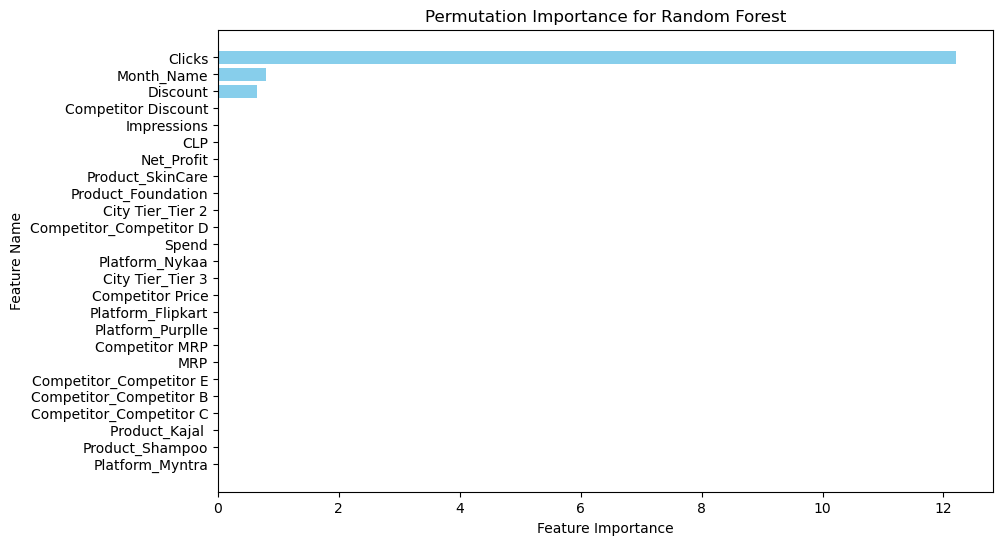

XGBoost - RMSE: 11.3197, MAE: 7.0740, R2: 0.7206


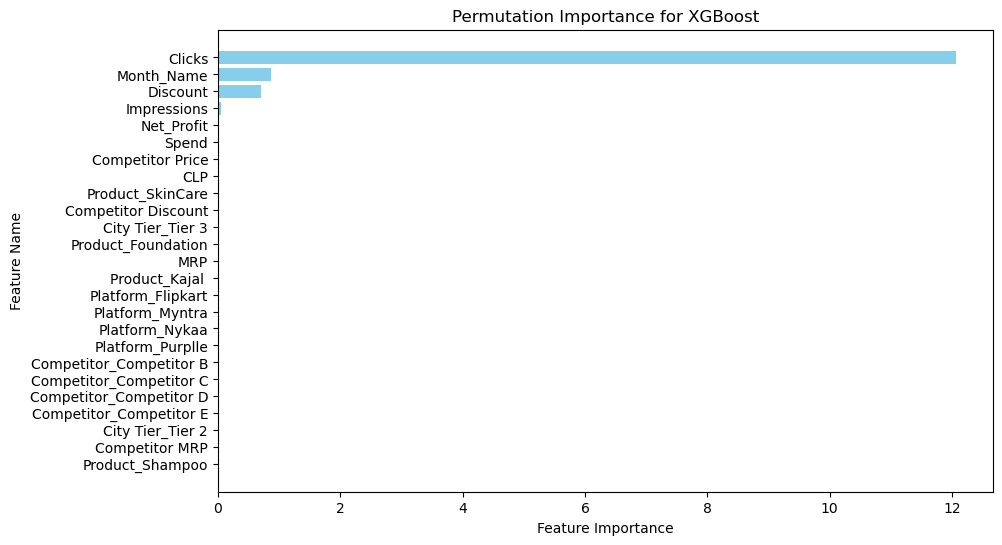

In [49]:
from sklearn.inspection import permutation_importance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    perm_importance = permutation_importance(model, X_test, y_test, scoring='neg_mean_absolute_error', 
                                             n_repeats=10, random_state=42)
    
    
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns, 
        'Importance': np.abs(perm_importance.importances_mean)  
    }).sort_values(by='Importance', ascending=False)
    
    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title(f'Permutation Importance for {name}')
    plt.gca().invert_yaxis() 
    plt.show()

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Neural Network using TensorFlow
model_nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation = 'linear')  # Output layer for regression
])
# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 505.9742 - mae: 14.2273 - val_loss: 149.3320 - val_mae: 8.3634
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 152.3481 - mae: 8.1806 - val_loss: 135.0784 - val_mae: 7.5615
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 144.4037 - mae: 7.7629 - val_loss: 133.1376 - val_mae: 7.4608
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 139.0255 - mae: 7.5438 - val_loss: 129.0124 - val_mae: 7.2436
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 139.9406 - mae: 7.5598 - val_loss: 123.4096 - val_mae: 7.1508
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136.1448 - mae: 7.5331 - val_loss: 123.4007 - val_mae: 7.2366
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 132.6490 - mae: 7.3753 - val_loss: 121.5409 - val_mae: 7.2033
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 130.2997 - mae: 7.4800 - val_loss: 121.3594 - val_mae: 7.2150
Epoch 9/50
400/400 ━━━━

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
125/125 ━━━━━━━

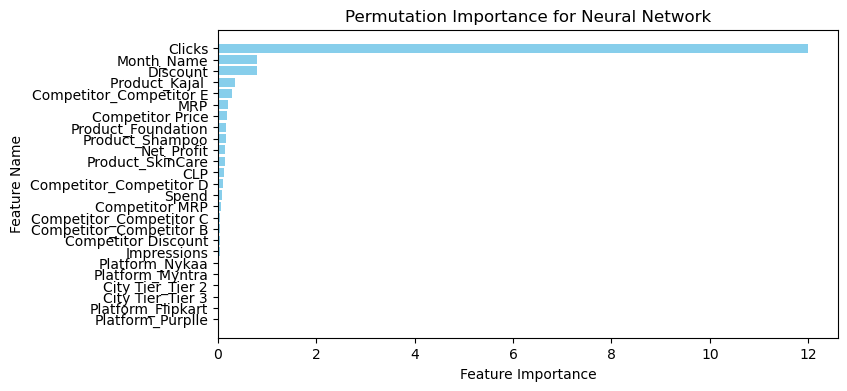

In [52]:
y_pred = model_nn.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
    
perm_importance = permutation_importance(model_nn, X_test, y_test, scoring='neg_mean_absolute_error', 
                                             n_repeats=10, random_state=42)
    
    
feature_importance_df = pd.DataFrame({
        'Feature': X.columns, 
        'Importance': np.abs(perm_importance.importances_mean)  
}).sort_values(by='Importance', ascending=False)
    
print(f"Neural Network - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Permutation Importance for Neural Network')
plt.gca().invert_yaxis() 
plt.show()